# 1.Combine 10% of MPD

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# single file of origin MPD is like songsXX.csv. in each the pid column values from 0 to 999, representing 1000 playlists in each csv.
# read files from songs0.csv to songs99.csv and write it into one file, with updated playlist id
dfs=[]
for i in range(0,100):
    filename='songs'+str(i)+'.csv'
    df=pd.read_csv(filename)
    df['pid']+= i*1000
    dfs.append(df)
df_final=pd.concat(dfs)
df_final.to_csv('test0-99.csv', encoding='utf-8', index=False)

# 2.Load 10% of MPD and Analysis

In [2]:
df1=pd.read_csv('test0-99.csv')
df1.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [3]:
df1.shape

(6677800, 9)

For each playlist, we have data on track name, artist, album and length of the songs.

In [4]:
print('Number of unique tracks: ',len(df1['track_uri'].unique()))
print('Number of unique artists: ',len(df1['artist_uri'].unique()))
print('Number of unique albums: ',len(df1['album_uri'].unique()))

Number of unique tracks:  681805
Number of unique artists:  110063
Number of unique albums:  271413


Over these 100000 playlists, there are 681805 different songs, 110063 different artists and 271413 different albums covered.

Plot distribution of tracks/artists/albums number in each playlist

In [5]:
df1_track=df1.groupby(['pid'])['track_uri'].unique()
df1_artist=df1.groupby(['pid'])['artist_uri'].unique()
df1_album=df1.groupby(['pid'])['album_uri'].unique()

track_1=np.zeros(len(df1_track), dtype=int)
for i in range(len(df1_track)):
    track_1[i]=len(df1_track[i])  
    
artist_1=np.zeros(len(df1_artist), dtype=int)
for i in range(len(df1_artist)):
    artist_1[i]=len(df1_artist[i])  
    
album_1=np.zeros(len(df1_album), dtype=int)
for i in range(len(df1_album)):
    album_1[i]=len(df1_album[i]) 

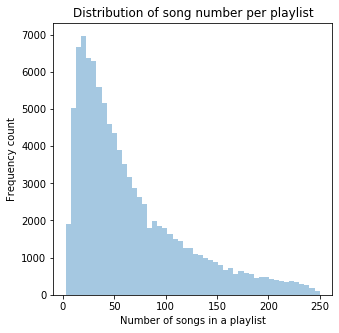

In [6]:
plt.figure(figsize=(5,5))
sns.distplot(track_1,kde=False)
plt.xlabel("Number of songs in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of song number per playlist")
plt.show()

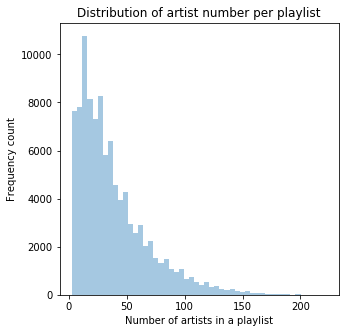

In [7]:
plt.figure(figsize=(5,5))
sns.distplot(artist_1,kde=False)
plt.xlabel("Number of artists in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of artist number per playlist")
plt.show()

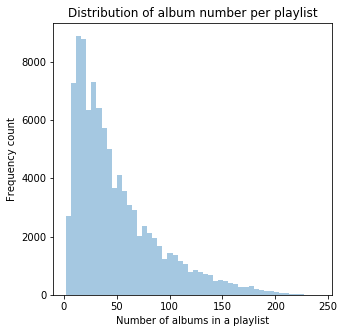

In [8]:
plt.figure(figsize=(5,5))
sns.distplot(album_1,kde=False)
plt.xlabel("Number of albums in a playlist")
plt.ylabel("Frequency count")
plt.title("Distribution of album number per playlist")
plt.show()

The histograms show that distribution of songs/artists/albums number are quite right-skewed.

In [9]:
df1_summary = pd.DataFrame({'Number of songs per playlist': track_1, 
                            'Number of artists per playlist': artist_1, 
                            'Number of albums per playlist': album_1})
df1_summary.describe()

,Number of songs per playlist,Number of artists per playlist,Number of albums per playlist
count,100000.000000,100000.000000,100000.000000
mean,65.890790,38.121690,49.789870
std,52.849538,30.171495,39.888158
min,3.000000,3.000000,2.000000
25%,26.000000,16.000000,20.000000
50%,49.000000,30.000000,37.000000
75%,91.000000,52.000000,68.000000
max,250.000000,222.000000,242.000000


Next, We explore what are the TOP 50 most popular songs/artists.

In [10]:
df2=df1.drop(columns=['pos'])
df2=df2.drop_duplicates()
df2.head()

,pid,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [11]:
df2.shape

(6589079, 8)

Some tracks appear multiple times within the same playlist

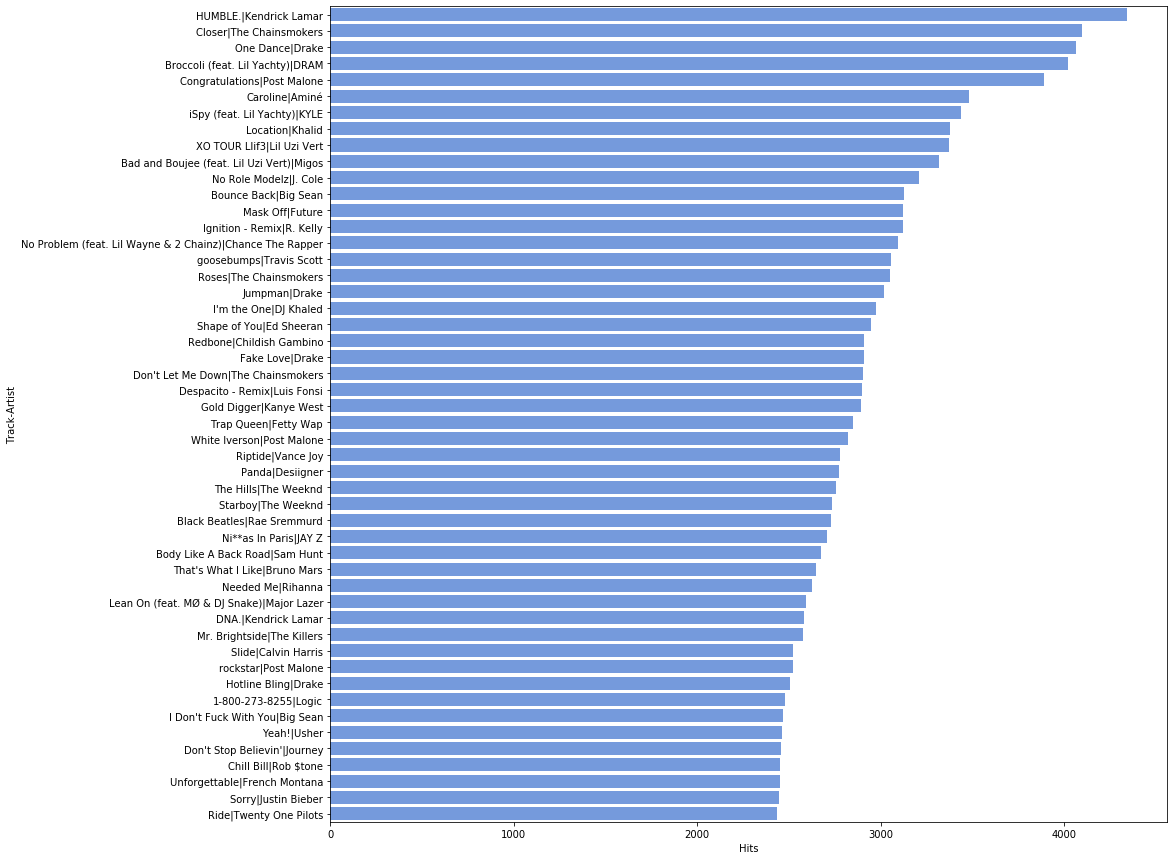

In [12]:
track_freq=df2.groupby( [ "track_name", "track_uri","artist_name",'artist_uri'] ).size().to_frame(name = 'Hits').reset_index()
track_freq=track_freq.sort_values("Hits", ascending=False)
track_freq.columns = ['Track name', 'Track uri', 'Artist name','Artist uri', 'Hits']
track_freq['Track-Artist']=track_freq['Track name'].astype(str) + '|'+track_freq['Artist name']
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Track-Artist", color='cornflowerblue',data=track_freq[:50])
plt.show()

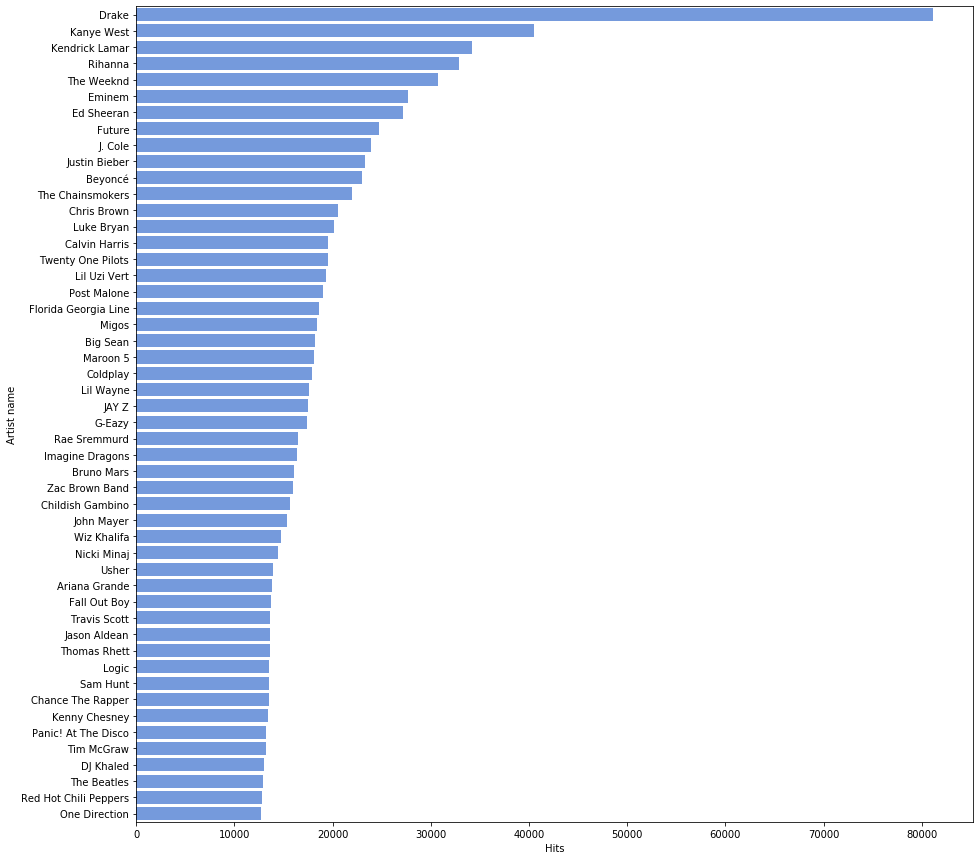

In [13]:
artist_freq=df2.groupby( [ "artist_name",'artist_uri'] ).size().to_frame(name = 'Hits').reset_index()
artist_freq=artist_freq.sort_values("Hits", ascending=False)
artist_freq.columns = ['Artist name','Artist uri', 'Hits']
plt.figure(figsize=(15,15))
sns.barplot(x="Hits", y="Artist name", color='cornflowerblue',data=artist_freq[:50])
plt.show()

In [15]:
print('Number of unique artists for TOP 50 tracks:',len(set(track_freq['Artist uri'][:50])))
print('Number of unique artists both for TOP 50 tracks and being TOP 50 artists themselves: ',
      len(set(track_freq['Artist uri'][:50]).intersection(set(artist_freq['Artist uri'][:50]))))

intersec=set(set(track_freq['Artist uri'][:50]).intersection(set(artist_freq['Artist uri'][:50])))
i=0
for each in list(track_freq['Artist uri'][:50]):
    if each in intersec:
        i+=1
        
print('Number of TOP 50 tracks that are performed by TOP 50 artists: ',i)

Number of unique artists for TOP 50 tracks: 40
Number of unique artists both for TOP 50 tracks and being TOP 50 artists themselves:  26
Number of TOP 50 tracks that are performed by TOP 50 artists:  36


Among the TOP 50 artists, 26 of them own credit for the TOP 50 songs. Among the TOP 50 songs, 36 of them come from TOP 50 artists. The popularity of songs and corresponding artists are highly correlated.

# 3. Features data and analysis

In [17]:
uri_full = df1.iloc[:,3].values
audio_dict_full = {uri:{} for uri in uri_full}

Scarp from Spotify's website (done on Google Colab)

In [ ]:
token = SpotifyClientCredentials(client_id='d7cad4d65418465aa89000c74cfd502d',
                                 client_secret='c21740cf91cf42439c9c311def06c9b3')
sp = spotipy.Spotify(client_credentials_manager = token,requests_timeout=10)
batch = 50
for k in tqdm(range(0,math.floor(len(uri_full)/batch))):
#     print(k)
    uris = [uri_full[i] for i in range(batch*k, min(batch*(k+1),len(uri_full)))]
    extracted = sp.audio_features(uris)
    for i in range(50):
        try:
            for item in ['danceability','energy','key','loudness','mode',
                        'speechiness','acousticness','instrumentalness',
                         'liveness','valence','tempo']:
                audio_dict_full[uri_full[batch*k+i]][item] = extracted[i][item]
        except TypeError:
            pass

MPD_audio_full = pd.DataFrame.from_dict(audio_dict_full,orient='index')
MPD_audio_0_99_file = 'MPD_audio_0_99.csv'
with open(MPD_audio_0_99_file, mode='w') as f:
    MPD_audio_full.to_csv(f)

In [20]:
df_features=pd.read_csv("MPD_audio_0_99.csv")
df_features=df_features.rename(columns={'Unnamed: 0':'track_id'})
df_features.head()

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0.904,0.813,4,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,125.461
1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040
2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,0.664,0.758,2,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,99.259
3,spotify:track:1AWQoqb9bSvzTjaLralEkT,0.891,0.714,4,-6.055,0,0.1400,0.20200,0.000234,0.0521,0.818,100.972
4,spotify:track:1lzr43nnXAijIGYnCT8M8H,0.853,0.606,0,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,94.759


In [21]:
df_features.shape

(681787, 12)

Not every track has matching features data

In [24]:
df_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000,681787.000000
mean,0.557497,0.605634,5.262495,-8.907492,0.656387,0.088546,0.320083,0.176837,0.207332,0.472334,120.585361
std,0.178798,0.254885,3.563572,5.131176,0.474914,0.108499,0.337746,0.320393,0.186261,0.262358,29.701692
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.428000,2.000000,-10.890000,0.000000,0.035000,0.019600,0.000000,0.096100,0.254000,97.395000
50%,0.570000,0.644000,5.000000,-7.589000,1.000000,0.047000,0.172000,0.000173,0.128000,0.460000,120.033000
75%,0.690000,0.818000,8.000000,-5.475000,1.000000,0.086200,0.605000,0.142000,0.262000,0.683000,139.334000
max,0.991000,1.000000,11.000000,4.638000,1.000000,0.967000,0.996000,1.000000,1.000000,1.000000,248.060000


Inspect the distribution of these variables.

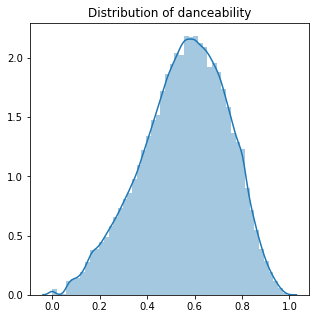

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['danceability'])
plt.xlabel("")
plt.title("Distribution of danceability")
plt.show()

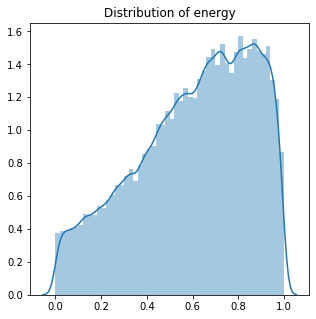

In [26]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['energy'])
plt.xlabel("")
plt.title("Distribution of energy")
plt.show()

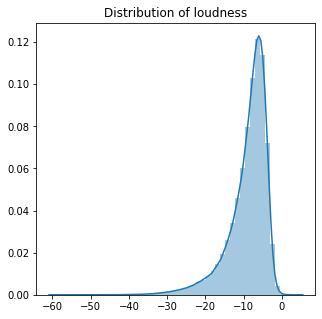

In [27]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['loudness'])
plt.xlabel("")
plt.title("Distribution of loudness")
plt.show()

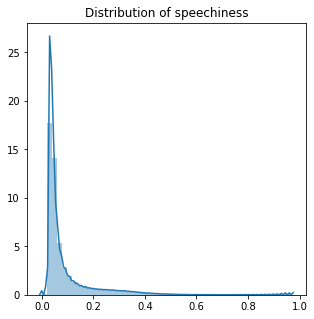

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['speechiness'])
plt.xlabel("")
plt.title("Distribution of speechiness")
plt.show()

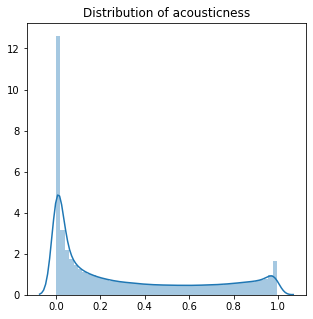

In [29]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['acousticness'])
plt.xlabel("")
plt.title("Distribution of acousticness")
plt.show()

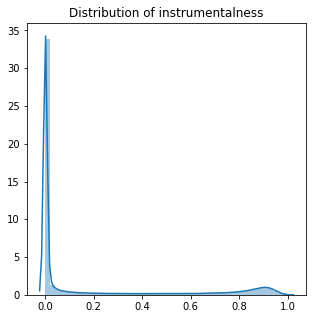

In [30]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['instrumentalness'])
plt.xlabel("")
plt.title("Distribution of instrumentalness")
plt.show()

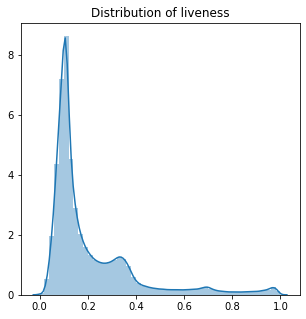

In [31]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['liveness'])
plt.xlabel("")
plt.title("Distribution of liveness")
plt.show()

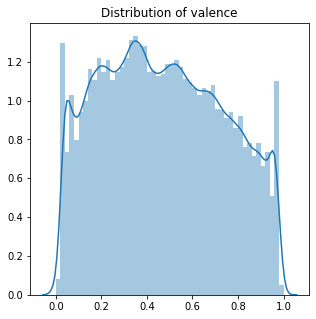

In [32]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['valence'])
plt.xlabel("")
plt.title("Distribution of valence")
plt.show()

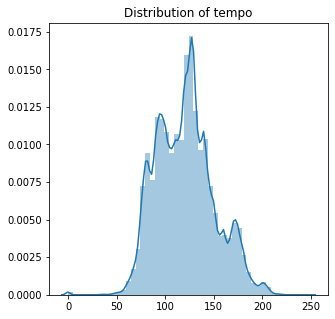

In [33]:
plt.figure(figsize=(5,5))
sns.distplot(df_features['tempo'])
plt.xlabel("")
plt.title("Distribution of tempo")
plt.show()

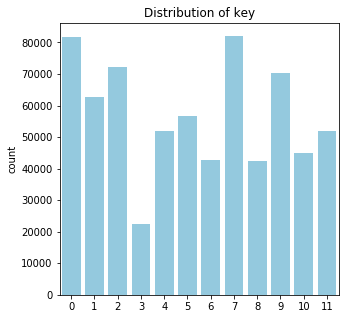

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(df_features['key'],color='skyblue')
plt.xlabel("")
plt.title("Distribution of key")
plt.show()

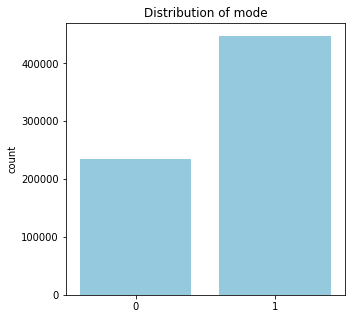

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(df_features['mode'],color='skyblue')
plt.xlabel("")
plt.title("Distribution of mode")
plt.show()

Since "key" is a categorical variable, we do one-hot coding. 

In [23]:
df_features2=pd.get_dummies(df_features, columns=['key'], drop_first=False)
df_features2.head()

,track_id,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0.904,0.813,-7.105,0,0.1210,0.03110,0.006970,0.0471,0.810,...,0,0,1,0,0,0,0,0,0,0
1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,0.774,0.838,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,...,0,0,0,1,0,0,0,0,0,0
2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,0.664,0.758,-6.583,0,0.2100,0.00238,0.000000,0.0598,0.701,...,1,0,0,0,0,0,0,0,0,0
3,spotify:track:1AWQoqb9bSvzTjaLralEkT,0.891,0.714,-6.055,0,0.1400,0.20200,0.000234,0.0521,0.818,...,0,0,1,0,0,0,0,0,0,0
4,spotify:track:1lzr43nnXAijIGYnCT8M8H,0.853,0.606,-4.596,1,0.0713,0.05610,0.000000,0.3130,0.654,...,0,0,0,0,0,0,0,0,0,0


Draw a matrix of correlation between there variables. Coding courtsey to https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

In [36]:
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(250, 10, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
def value_to_color(val):    
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(12,12))
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique(),reverse=True)]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot    
    
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size.abs() * size_scale,
        c=size.apply(value_to_color), # Vector of square color values, mapped to color palette
    marker='s')
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
    y=bar_y,
    width=[5]*len(palette), # Make bars 5 units wide
    left=col_x, # Make bars start at 0
    height=bar_height,
    color=palette,
    linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

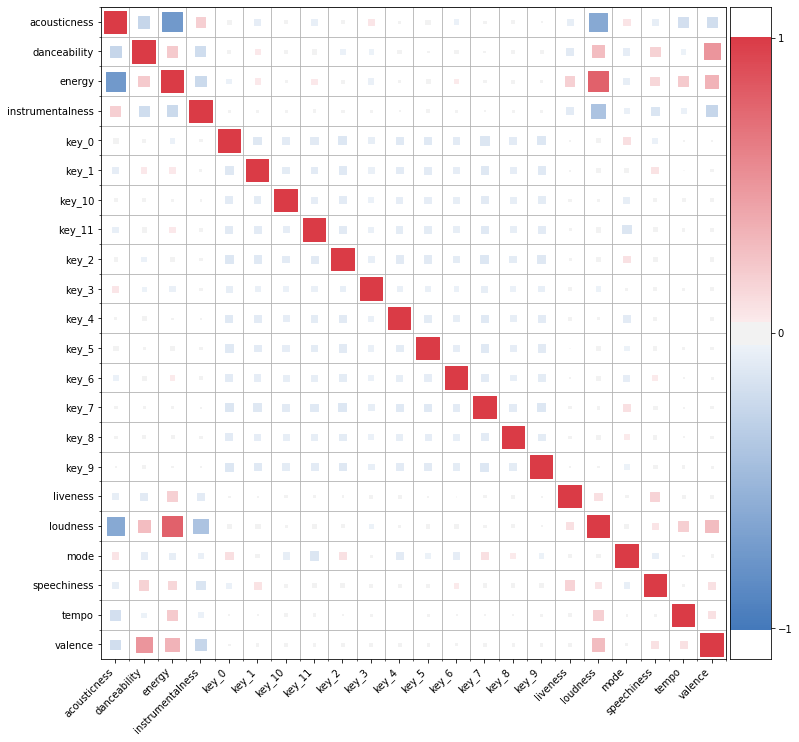

In [38]:
corr=df_features2.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value']
)
plt.show()